# Iris Species Prediction





![Iris Species Prediction](https://miro.medium.com/v2/resize:fit:1000/0*VucNhXeY_YFMwHOZ)

The Iris Species Prediction project involves predicting the species of Iris flowers based on their petal and sepal measurements. In this project, I've utilized the well-known Iris dataset, a multivariate dataset introduced by Ronald Fisher in 1936.

## Dataset Overview

The Iris dataset comprises measurements of four features of three different species of Iris flowers: Setosa, Versicolor, and Virginica. These features include sepal length, sepal width, petal length, and petal width, all measured in centimeters. The dataset consists of 150 samples, with 50 samples for each species.

For this project, I applied Principal Component Analysis (PCA) to perform dimensionality reduction on the Iris dataset. PCA allows us to identify the most significant features and project the data onto a lower-dimensional space. By doing so, one can visualize the data and gain insights into its inherent structure.

Furthermore, I employed the K-means clustering algorithm on the reduced dataset to group similar Iris samples together. K-means clustering partitions the data into distinct clusters based on their proximity to each other. This enables one to identify patterns and groupings within the Iris species based on their feature measurements.

By implementing PCA and K-means clustering, the aim is to uncover hidden relationships and patterns within the Iris dataset, ultimately enhancing our ability to predict the correct species of Iris flowers based on their measurements.

# Outline

1. Importing Libraries
2. Loading Dataset
3. Data Analysis & Visualization (EDA)
4. Data Preprocessing
5. Principal Component Analysis
5. K-means Clustering
6. Comparison

# 1. Importing Libraries

Let us import the required libraries to work with our project

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Loading Dataset

Loading the data from a csv file named 'Iris Dataset' into a Pandas DataFrame

In [230]:
data = pd.read_csv('Iris Dataset.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# 3. Data Analysis & Visualization

The dataset is analysed in order to find any errors, null values(missing values), outliers and data distribution. Additionally, during this part we can find certain relationships and patterns & trends between variables.

In [231]:
data.drop('Id', axis = 1, inplace = True)  # This column is not required

In [232]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [233]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [234]:
data.describe() 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [235]:
data.isnull().sum() 

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Hence, there are no null values or any errors

 ## Visualization

In [236]:
sns.set()

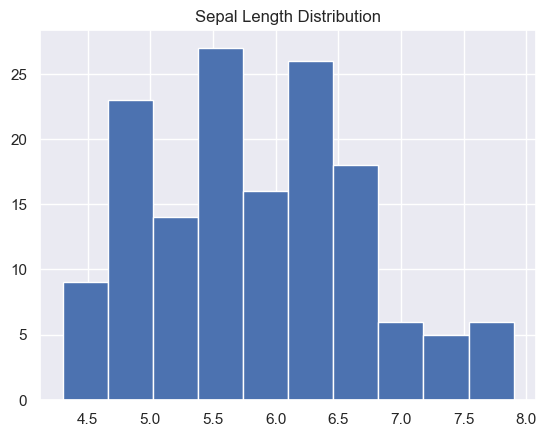

In [237]:
data['SepalLengthCm'].hist()
plt.title('Sepal Length Distribution')
plt.show()

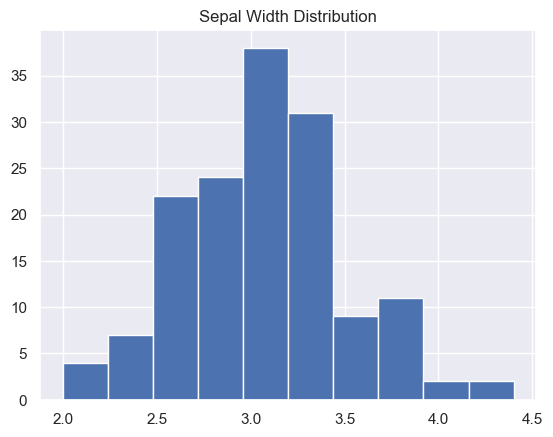

In [238]:
data['SepalWidthCm'].hist()
plt.title('Sepal Width Distribution')
plt.show()

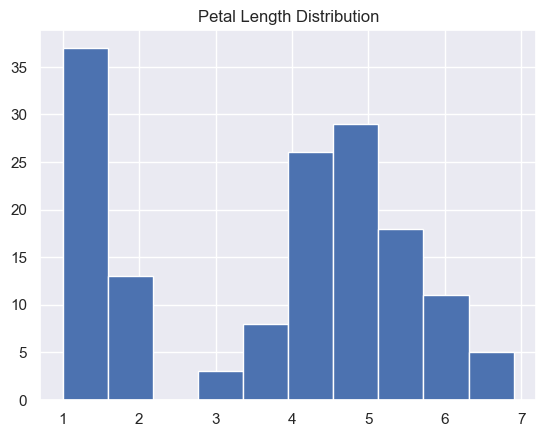

In [239]:
data['PetalLengthCm'].hist()
plt.title('Petal Length Distribution')
plt.show()

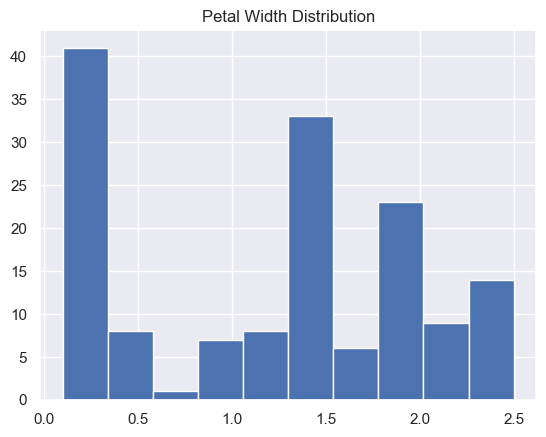

In [240]:
data['PetalWidthCm'].hist()
plt.title('Petal Width Distribution')
plt.show()

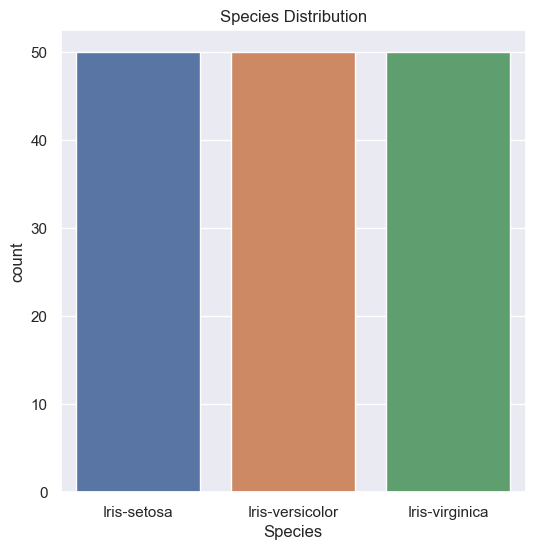

In [241]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'Species', data = data)
plt.title('Species Distribution')
plt.show()

The species in this dataset is uniformly distributed

In [242]:
data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [243]:
palette={'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}

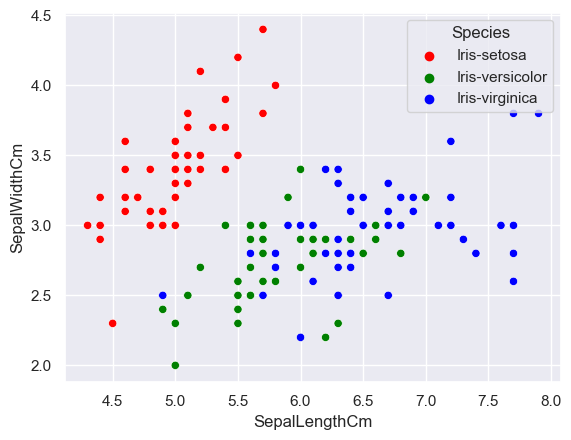

In [244]:
sns.scatterplot(data=data, x='SepalLengthCm', y='SepalWidthCm', hue='Species', palette = palette)
plt.show()

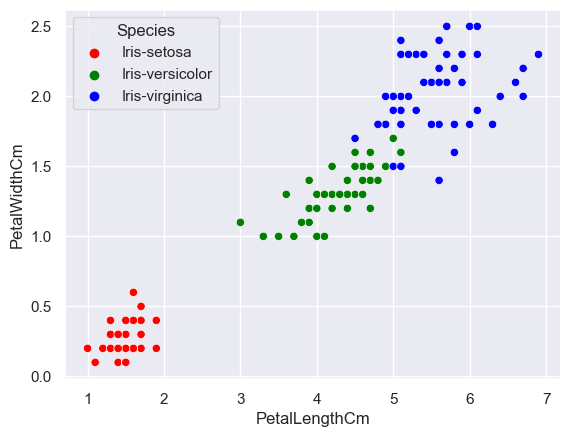

In [245]:
sns.scatterplot(data=data, x='PetalLengthCm', y='PetalWidthCm', hue='Species', palette = palette)
plt.show()

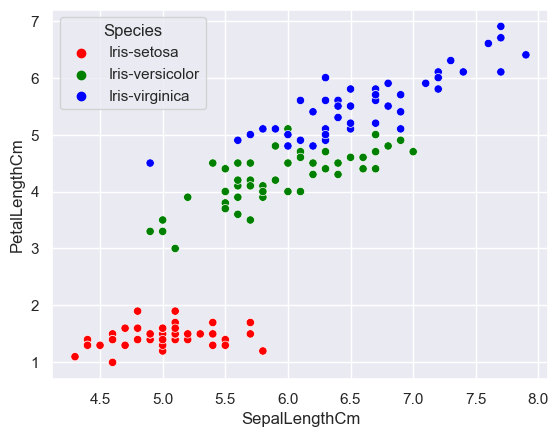

In [246]:
sns.scatterplot(data=data, x='SepalLengthCm', y='PetalLengthCm', hue='Species', palette = palette)
plt.show()

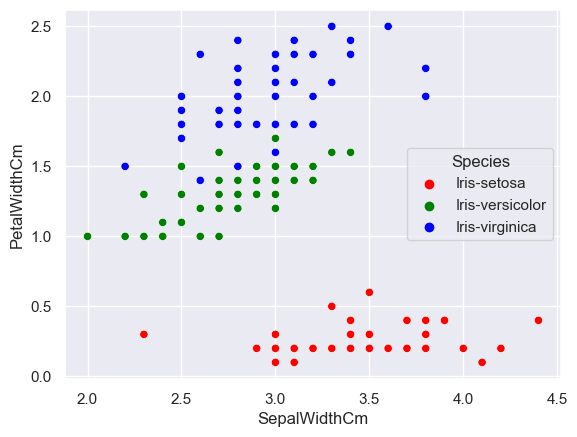

In [247]:
sns.scatterplot(data=data, x='SepalWidthCm', y='PetalWidthCm', hue='Species', palette = palette)
plt.show()

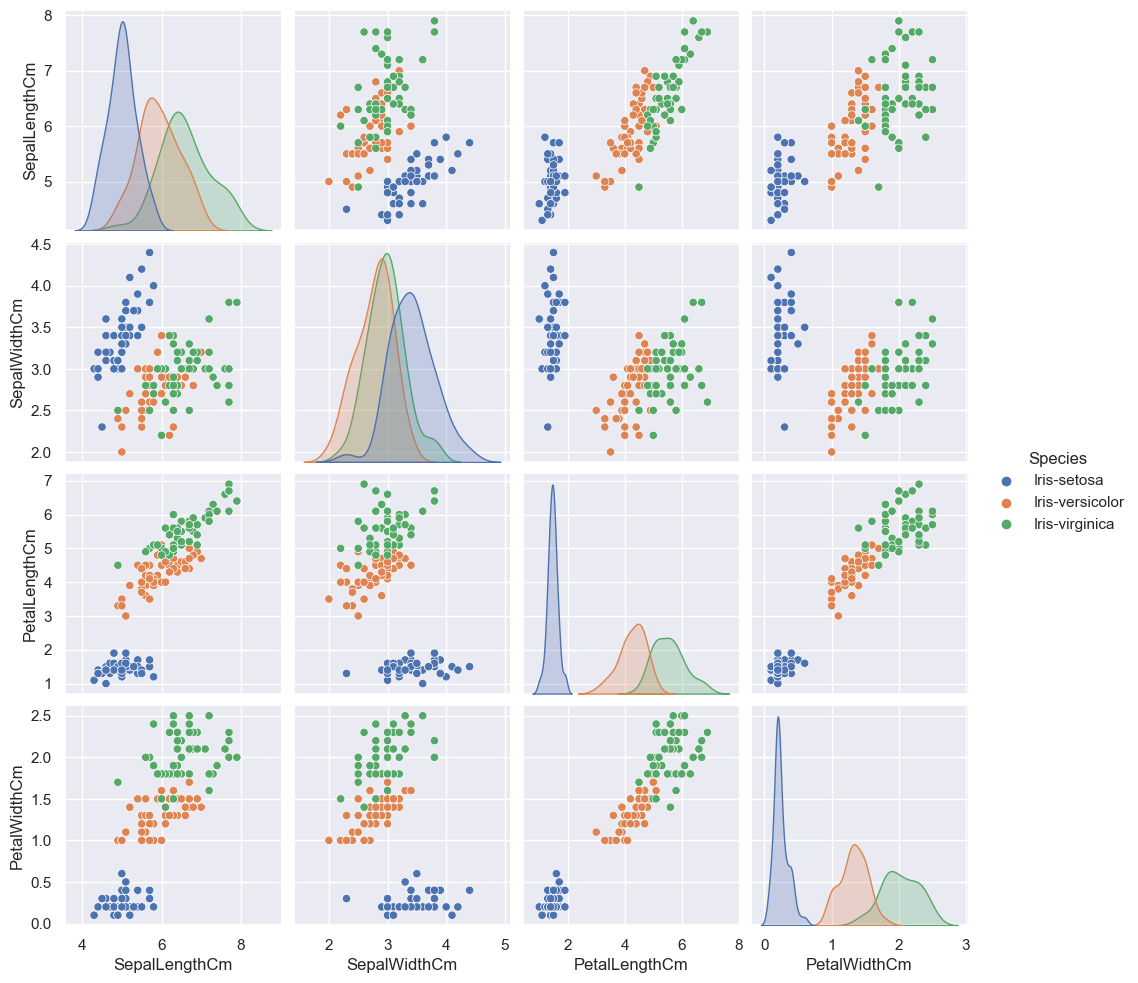

In [248]:
sns.pairplot(data, hue = 'Species')

# 4. Data Preprocessing

Here, we're encoding the categorical variable named Species.

In [249]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [250]:
data.replace({'Species' : {'Iris-setosa' : 0, 'Iris-versicolor' : 1, 'Iris-virginica' : 2}}, inplace = True)

The correlation map is used to understand the relationships between different features in this dataset.

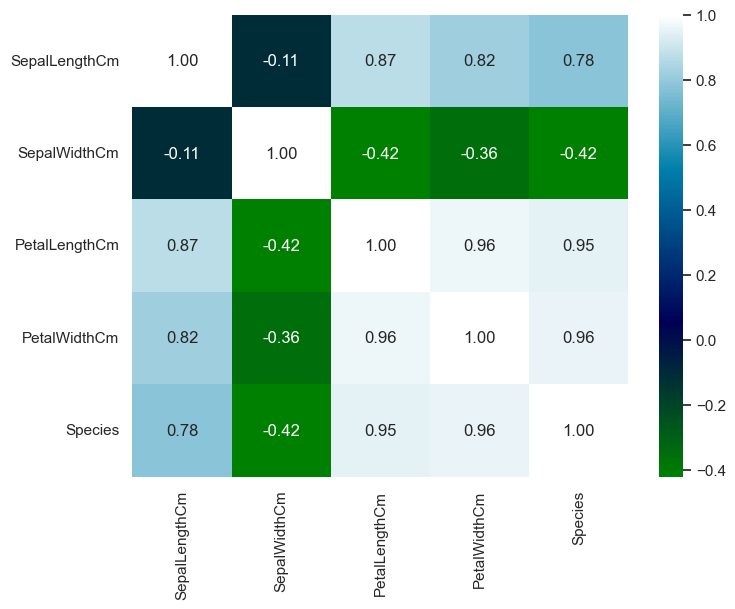

In [251]:
data.corr()
plt.figure(figsize = (8, 6))
sns.heatmap(data.corr(), annot = True, cmap = 'ocean', fmt = '.2f')
plt.show()

In [252]:
#Separation of Dataset

X = data.drop('Species', axis = 1) 
Y = data['Species']

In [253]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [254]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

 # 5. Principal Component Analysis
 ### Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a dimensionality reduction technique that is commonly used in data analysis and machine learning. It helps to identify and extract the most informative features or components from a dataset.

PCA involves transforming the original features into a new set of orthogonal components called principal components. These components are ranked in order of their variance, with the first component capturing the maximum variance in the data, followed by the second component capturing the next highest variance, and so on.

#### Formula

The PCA algorithm can be summarized using the following mathematical formula:

1. Standardize the data:
$$X_{\text{standardized}} = \frac{{X - \text{mean}(X)}}{{\text{std}(X)}}$$

2. Compute the covariance matrix:
   $$covariancematrix = cov(X_{\text{standardized}})$$
   
3. Compute the eigenvalues and eigenvectors of the covariance matrix:
  $$eigenvalues, eigenvectors = eig(covariance\_matrix)$$


4. Sort the eigenvalues in descending order and rearrange the corresponding eigenvectors accordingly.



5. Project the standardized data onto the first k eigenvectors to obtain the transformed dataset:
   $$X_{\text{projected}} = X_{\text{standardized}} \cdot \text{eigenvectors}_{\text{sorted}}[:, :k]$$


PCA helps in reducing the dimensionality of the dataset while retaining the most important information. The transformed dataset, obtained by projecting the original data onto the principal components, can be used for further analysis or modeling tasks.

To find the standardized and the Co-variance between each features

In [255]:
x = X.values
x_standardized = (x - np.mean(x, axis=0)) / np.std(x, axis=0)
cov_matrix = np.cov(x_standardized.T)
cov_matrix

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

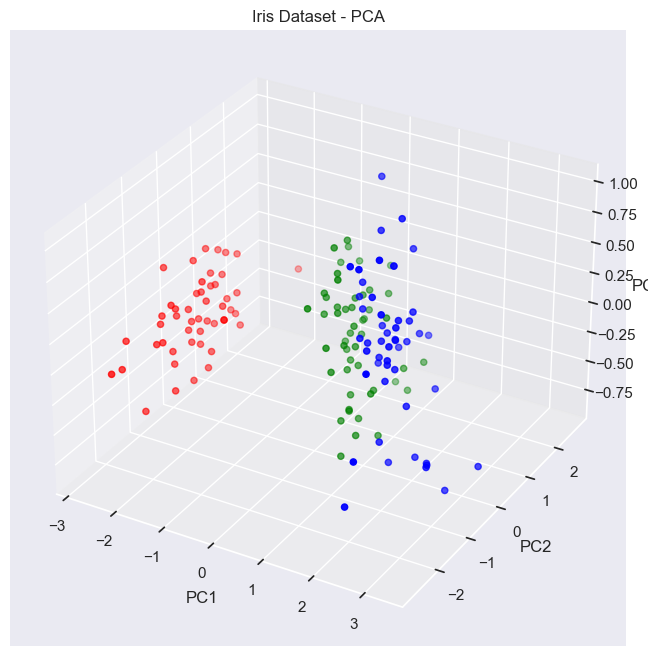

In [291]:
# Perform eigendecomposition on the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort the eigenvectors and eigenvalues in descending order
eigen_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[eigen_indices]
eigenvectors_sorted = eigenvectors[:, eigen_indices]

# Transform the standardized data onto the first three eigenvectors
X_transform = np.dot(x_standardized, eigenvectors_sorted[:, :3])

from mpl_toolkits.mplot3d import Axes3D

# Convert the color mapping to a list of colors
color_mapping = data['Species'].map({0 : 'red', 1: 'green', 2: 'blue'})
colors = [color_mapping[i] for i in range(len(X_projected))]

# Create a scatter plot of the projected data
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_transform[:, 0], X_transform[:, 1], X_transform[:, 2], c=colors)

# Set labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Iris Dataset - PCA')

# Show the plot
plt.show()


In [295]:
print(X_transform.shape)
print(x_standardized.shape)
print(eigenvectors_sorted.shape)

(150, 3)
(150, 4)
(4, 4)


Hence, the original vector x_standardized dimension (150 X 4) is reduced into (150 X 3) after multiplying it with the eigen_vectors_sorted.

Now, that vector is the transformed matrix with only the required 3 features which have maximum correlation

In [296]:
# Print the eigenvalues
for i, eigenvalue in enumerate(eigenvalues_sorted[:3]):
    print(f'Eigenvalue {i+1}: {eigenvalue:.4f}')

Eigenvalue 1: 2.9304
Eigenvalue 2: 0.9274
Eigenvalue 3: 0.1483


Hence, the first three features are taken into the consideration after finding the eigen values [SepalLengthCm, SepalWidthCm, PetalLengthCm]

# 6. K-means Clustering

In [331]:
class KMeans:
    def __init__(self, k):
        self.k = k
    
    def fit(self, X):
        # Randomly initialize cluster centroids
        random_indices = np.random.choice(X.shape[0], size=self.k, replace=False)
        self.centroids = X[random_indices]
        
        # Initialize cluster assignments
        self.labels = np.zeros(X.shape[0])
        
        while True:
            # Assign data points to the closest centroid
            distances = self._euclidean_distance(X, self.centroids)
            new_labels = np.argmin(distances, axis=1)
            
            # If no points changed cluster, stop the algorithm
            if np.array_equal(self.labels, new_labels):
                break
            
            # Update cluster assignments
            self.labels = new_labels
            
            # Update cluster centroids
            for i in range(self.k):
                cluster_points = X[self.labels == i]
                self.centroids[i] = np.mean(cluster_points, axis=0)
    
    def predict(self, X):
        distances = self._euclidean_distance(X, self.centroids)
        return np.argmin(distances, axis=1)
    
    def _euclidean_distance(self, X1, X2):
        return np.sqrt(np.sum((X1[:, np.newaxis] - X2) ** 2, axis=2))

# Perform K-means clustering with k=3
kmeans = KMeans(k = 3)
kmeans.fit(x_standardized)
predicted_labels = kmeans.predict(x_standardized)



In [332]:
print(predicted_labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


# 7. Comparison

## Actual Clustering vs Predicted Clustering

I compared the actual clustering of the Iris species with the predicted clustering obtained from the K-means algorithm.


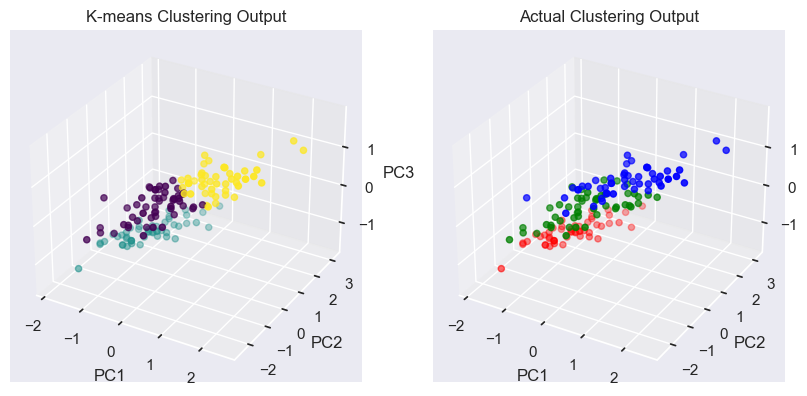

In [334]:
# Create a scatter plot of the cluster output
fig = plt.figure(figsize = (10, 8))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x_standardized[:, 0], x_standardized[:, 1], x_standardized[:, 2], c=predicted_labels, cmap = 'viridis')

# Create a scatter plot of the actual species labels
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(x_standardized[:, 0], x_standardized[:, 1], x_standardized[:, 2], c=data['Species'].map({0: 'red', 1 : 'green', 2 : 'blue'}))

# Set labels and title
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')
ax1.set_title('K-means Clustering Output')

ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3')
ax2.set_title('Actual Clustering Output')

# Show the plots
plt.show()

Therefore, you can see that the model predicts most of the species correctly. But it could be improved better if one have a large dataset.